# 単回帰分析

## Numpy

In [3]:
import numpy as np

In [8]:
#ベクトルの定義
x = np.array([1, 2, 3])

In [6]:
x

array([1, 2, 3])

In [7]:
y = np.array([2, 3.9, 6.1])

In [9]:
y

array([2. , 3.9, 6.1])

### データの中心化

In [10]:
#　平均の算出
x.mean()

2.0

In [11]:
y.mean()

4.0

In [12]:
# 中心化
xc = x - x.mean()

In [13]:
xc

array([-1.,  0.,  1.])

In [14]:
yc = y - y.mean()

In [15]:
yc

array([-2. , -0.1,  2.1])

### パラメータaの計算

In [20]:
# 要素ごとの掛け算(要素積)
xx = xc * xc

In [21]:
xx

array([1., 0., 1.])

In [27]:
xy = xc * yc

In [28]:
xy

array([ 2. , -0. ,  2.1])

In [29]:
xx.sum()

2.0

In [30]:
xy.sum()

4.1

In [31]:
a = xy.sum()/xx.sum()

In [33]:
a

2.05

# データベース操作

## Pandas

In [36]:
import pandas as pd

In [46]:
# CSVファイル読み込み
# df: data frame
df = pd.read_csv('AI/original.csv')

In [49]:
df.head(3)

,x,y
0,40.362,137500
1,40.686,132500
2,38.430,93000


In [52]:
# データの抽出
x = df['x']
y = df['y']

## グラフの描画

## Matplotlib

In [54]:
import matplotlib.pyplot as plt

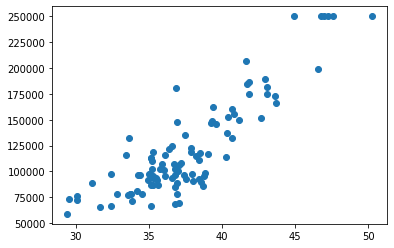

In [57]:
# 縦軸をx、縦軸をyの散布図(scatter)をプロット
plt.scatter(x, y)

## 単回帰分析の実装

### データの中心化

In [60]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [61]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [63]:
# 中心化
df_c = df - df.mean()

In [64]:
df_c.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [65]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.172396e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [66]:
# データの抽出
x = df_c['x']
y = df_c['y']

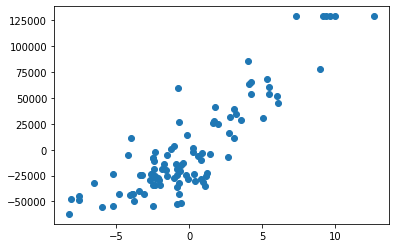

In [67]:
# xとyの散布図をプロット
plt.scatter(x, y)

## パラメータaの計算
傾き$a$の計算
$$
a=\dfrac{\displaystyle{\sum_{n=1}^{N}}x_{n}y_{n}}
{\displaystyle{\sum_{n=1}^{N}}x_{n}^{2}}
$$

In [68]:
xx = x * x  # * は要素積

In [69]:
xy = x * y

In [71]:
a = xy.sum()/xx.sum()

In [72]:
a

10069.022519284063

### プロットして確認
$$
\hat{y} = ax
$$

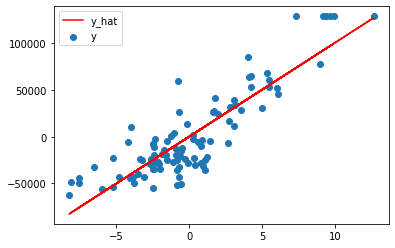

In [79]:
plt.scatter(x, y, label='y')  #実測値
plt.plot(x, a * x, label='y_hat', color='red')  #予測値
plt.legend()  # 判例の表示
plt.show()

### 予測値の計算
$$
\begin{align}
y-{\bar y}&=a(x-{\bar x})\\
\rightarrow y&=a(x-{\bar x}) + {\bar y}
\end{align}
$$

In [80]:
x_new = 40  #40平米の部屋

In [82]:
mean = df.mean()

In [83]:
mean['x']

37.62222

In [84]:
# 中心化
xc = x_new - mean['x']

In [85]:
xc

2.3777800000000013

In [88]:
# 単回帰分析による予測
yc = a * xc

In [89]:
yc

23941.920365903272

In [91]:
# 元のスケールの予測値
y_hat = a * xc + mean['y']

In [92]:
y_hat

145006.92036590326

### 予測値を計算する関数の作成

In [107]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.0
    # 中心化
    xc = x - xm
    # 予測値の計算
    y_hat = a * xc + ym
    # 出力
    return y_hat

In [108]:
# 予測値
predict(40)

145006.92036590326

In [113]:
predict(30)

44316.695173062646

In [115]:
predict(50)

245697.1455587439